## Lista 2 - Camilla Balliana

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
from math import pi
from scipy.special import jn as j

### Questão 1

In [2]:
#a)

def f(t):
    return math.exp(-t**2)

def trapezio(f, a, b, N):
    h = (b-a)/N
    soma = (f(a)+f(b))/2
    for k in range(1,N):
        soma = soma + f(a+k*h)
    return h*soma
    
a = 0
N = 1000
lista = []

for b in np.arange(0,3,0.1):
    lista.append(trapezio(f, a, b, N))
    print(f'O resultado da integral para o limite de {a} à {b:.2f} é: {trapezio(f, a, b, N)}')

O resultado da integral para o limite de 0 à 0.00 é: 0.0
O resultado da integral para o limite de 0 à 0.10 é: 0.0996676641253281
O resultado da integral para o limite de 0 à 0.20 é: 0.1973650296453185
O resultado da integral para o limite de 0 à 0.30 é: 0.2912378785442755
O resultado da integral para o limite de 0 à 0.40 é: 0.3796528306109418
O resultado da integral para o limite de 0 à 0.50 é: 0.4612809901877756
O resultado da integral para o limite de 0 à 0.60 é: 0.53515350169173
O resultado da integral para o limite de 0 à 0.70 é: 0.6006856330609339
O resultado da integral para o limite de 0 à 0.80 é: 0.6576698113327736
O resultado da integral para o limite de 0 à 0.90 é: 0.706241460913283
O resultado da integral para o limite de 0 à 1.00 é: 0.7468240714991843
O resultado da integral para o limite de 0 à 1.10 é: 0.7800613664264724
O resultado da integral para o limite de 0 à 1.20 é: 0.8067446898879247
O resultado da integral para o limite de 0 à 1.30 é: 0.8277429218283064
O resultad

Text(0.5, 0, 'x')

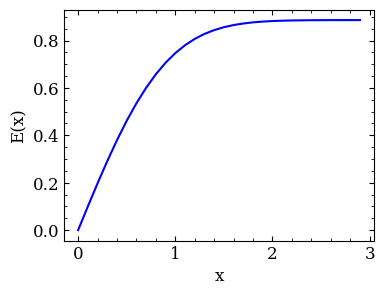

In [3]:
#b)

x = np.arange(0,3,0.1)

fig = plt.figure(figsize=(4,3))

plt.plot(x,lista, c = 'b')
plt.ylabel('E(x)')
plt.xlabel('x')

## Questão 2

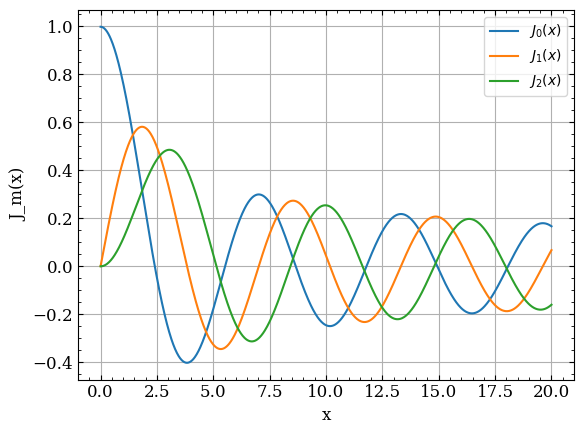

In [5]:
from numpy import sin, cos, pi, dot

a = 0
b = pi

def J(m, x, N):
    h = (b - a) / N
    theta = np.linspace(a, b, N)
    w = np.ones(N)
    w[1:-1:2] = 4
    w[2:-1:2] = 2

    integral = (h / 3) * dot(cos(m * theta - x[:, np.newaxis] * sin(theta)), w)
    return integral / pi
    
x = np.linspace(0, 20, 1000)

J0 = J(0, x, 1000)
J1 = J(1, x, 1000)
J2 = J(2, x, 1000)

plt.plot(x, J0, label='$J_0(x)$')
plt.plot(x, J1, label='$J_1(x)$')
plt.plot(x, J2, label='$J_2(x)$')
plt.xlabel('x')
plt.ylabel('J_m(x)')
plt.legend(fontsize = 'small')
plt.grid()

Text(0, 0.5, 'Posição y')

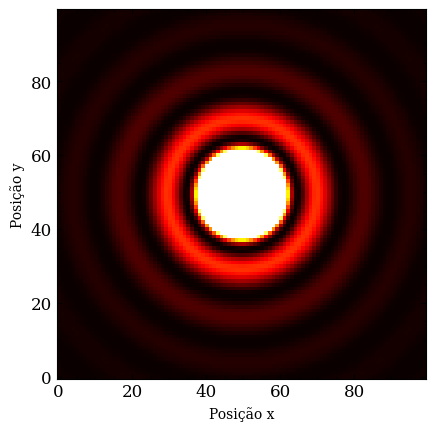

In [6]:
#b)
lan = 500e-9
k = 2*pi/lan
r = []
linha_1 = []

x = np.linspace(-1e-6,1e-6,100)
y = np.linspace(-1e-6,1e-6,100)

for i in range(100):
    for q in range(100):
        temp = (x[i]**2+y[q]**2)**0.5
        linha_1.append(temp)
    r.append(linha_1)
    linha_1=[]
I = []

def j(m, x, N): #utilizarei a mesma função, porem 'x' será uma variavel escalar neste caso, para conseguir plotar o gráfico
    theta = np.linspace(0, pi, N)
    h = theta[1] - theta[0]
    w = np.ones(N)
    w[0] = w[-1] = 1
    w[1:-1:2] = 4
    w[2:-1:2] = 2
    integral = (h / 3) * np.dot(np.cos(m * theta - x * np.sin(theta)), w)
    return integral / pi

for i in range(100):
    linha_2 = []
    for q in range(100):
        temp = (k*r[i][q])
        linha_2.append((j(1,temp, 1000)/temp)**2)
    I.append(linha_2)
    linha_2 = []

plt.imshow(I, origin='lower', vmax=0.01, cmap='hot')
plt.xlabel('Posição x', fontsize = 'small')
plt.ylabel('Posição y', fontsize = 'small')

### Questão 3

In [7]:
#a)
def f(x):
    return x**4 - 2*x + 1

a = 0
b = 2
N1 = 10
N2 = 20

def trapezio(a, b, N):
    h = (b - a) / N
    integral_t = (f(a) + f(b)) / 2
    for i in range(1, N):
        integral_t += f(a + i*h)
    return integral_t*h

I1 = trapezio(a, b, N1)
I2 = trapezio(a, b, N2)
print(I1, I2)

4.50656 4.426660000000001


In [8]:
e2 = 1/3 * (I2 - I1)

valor_real = 4.4

erro_valor_real = abs(valor_real - I2) # Erro absoluto

print("Valor da integral com 20 fatias:", I2)
print("Estimativa do erro:", e2)
print("Erro absoluto:", erro_valor_real)


Valor da integral com 20 fatias: 4.426660000000001
Estimativa do erro: -0.026633333333333137
Erro absoluto: 0.026660000000000572


O erro calculado pela fórmula dada na questão é muito mais preciso que o erro absoluto, pois o erro absoluto considera apenas os 3 primeiros termos de uma série de Taylor.

### Questão 4

In [9]:
from numpy import sqrt,sin

In [10]:
#definindo as funções, vamos ter:
def f(x):
    return sin(sqrt(100 * x))**2

def trapezio(a, b, N):
    h = (b - a) / N
    res_t = (f(a) + f(b)) / 2
    for i in range(1, N):
        res_t += f(a + i*h)
    return res_t*h

def trapezio_adaptativa(a, b, eps):
    N = 1
    integral_old = trapezio(a, b, N)
    while True:    # aqui irei utilizar um loop infinito para iterativamente aumentar o número de fatias até alcançar a precisão desejada,
                   #que no caso, o erro da integral precisa ser menor que o resultado com a precisão que desejamos.
        N *= 2
        integral_new = trapezio(a, b, N)
        erro = abs(integral_new - integral_old)
        if erro < eps:
            return integral_new, erro, N
        integral_old = integral_new

In [11]:
a = 0
b = 1

eps = 1e-6

integral, erro, n_fatias = trapezio_adaptativa(a, b, eps)

print("Número de fatias até atingir a precisao:", n_fatias)
print("Estimativa da integral:", integral)
print("Estimativa do erro:", erro)


Número de fatias até atingir a precisao: 8192
Estimativa da integral: 0.4558324138011339
Estimativa do erro: 3.555228633156382e-07
